<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch2_5~6_pg_118~145_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch2. 5~6 pg. 118 ~ 145 필사

## CH05. 데이터 전처리

1. ML 알고리즘 적용 전, 데이터에 대해 미리 처리해야 할 기본 사항
 1) 결손값, Nan, Null 값 허용 X > 고정된 다른 값으로 변환 필요 (피처의 평균값 or drop...)
 2) 머신러닝 알고리즘 : 문자열 값을 입력값으로 허용 X > 문자열 값 인코딩돼서 숫자형으로 변환 필요
  - 카테고리형 피처 : 코드값 표현
  -텍스트형 피처 : 피처 벡터화 등으로 벡터화 혹은 불필요한 피처라고 판단될 시 삭제 (ex.단순 주민번호, ID...> 식별자 코드 예측에 중요 X)

### 데이터 인코딩

#### 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환하는 것
: 간단하게 문자열 값을 숫자형 카테고리 값으로 변환함
ex. TV, 냉장고, 전자레인지 > 1,2,3

- 주의 : '01' 등은 문자열 > 1,2와 같은 숫자형 값으로 변환해야 함
- 일괄적인 숫자 값으로 변환됨 > 몇몇 ML 알고리즘에 적용 시 예측 성능 감소 
 - 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문
 - 특정 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 수 있음
 - But, 숫자변환값은 단순 코드, 숫자값에 따른 순서나 중요도로 인식되어선 X
 - **레이블 인코딩: 선형 회귀와 같은 M 알고리즘에 적용되지 말아야 함**
 - 트리계열 ML 알고리즘: 레이블 인코딩도 별 문제 X(숫자 특성 반영 X)

**LabelEncoder 클래스**로 구현
 - LabelEncoder를 객체로 생성 > fit() & transform() 호출해 레이블 인코딩 수행

In [95]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
#결과: items의 순서대로 변환: TV=0, 냉장고=1, 전자레인지=4, 컴퓨터=5, 선풍기=3, 믹서=2

인코딩 변환값: [0 1 4 5 3 3 2 2]


- 문자열 값이 어떤 값으로 인코딩되었는지 아래 속성값으로 확인

**classes_ 속성** : 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있음

In [96]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


- inverse_transform()을 통해 인코딩된 값을 다시 인코딩 가능능

In [97]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


#### 원-핫 인코딩(One-Hot Encoding)
: 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1, 나머지 칼럼에는 0으로 표시하는 방식

- 행 형태로 되어 있있는 피처의 고유값을 열 형태로 차원 변환 > 고유 값에 해당하는 칼럼에만 1, 나머지 칼럼에는 0을 표시하는 것 = 해당 고유 값에 매칭되는 피처만 1, 나머지 피처는 0 입력됨
- 레이블 인코딩의 숫자코드의 가중치의 단점을 해결하기 위한 인코딩 방식

**OneHotEncoder 클래스**로 구현
 - OneHowEncoder로 변환 전 모든 문자열 값이 숫자형 값으로 변환되어야 함
 - 입력값으로 2차원 데이터가 필요함

In [98]:
from IPython.core.completer import ProvisionalCompleterWarning
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환을 위해 LabelENcoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


결과 해석 : 8새의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환됨
-TV:첫번째 칼럼 / 냉장고:두번째칼럼/ 믹서:세번째칼럼 / 선풍기:네번째칼럼 / 전자레인지 : 다섯번째칼럼 / 컴퓨터 : 여섯번째 칼럼

** 판다스 : 원-핫 인코딩 더 쉽게 지원하는 API : get_dummies() 이용**

- 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환 가능

In [99]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

**피처스케일링(feature scaling)** : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 표준화(Standardization) : 데이터 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것

- 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (ex.거리-금액) 
  - 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것

**벡터 정규화**
- Normalizer 모듈: 선형대수에서의 정규화 개념 적용됨 = 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미 
  - 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠줌

### StandardScaler (피처 스케일링 클래스)
: 개별 피처를 평균이 0, 분산이 1인 값으로 변환해주는 표준화를 쉽게 지원해주기 위한 클래스

- 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현된 RBF커널-서포트 벡터 머신 / 선형 회귀 / 로지스틱 회귀의 예측 향상에 중요할 수도 있음

In [100]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- StandardScaler를 통한 각 피처 한 번에 표준화해 변환하는 방법

1) StandardScaler 객체 생성
2) fit()과 transform() 메서드에 변환 대상 피처 데이터 세트 입력 후 호출 
3) transform() 후 스케일 변환된 데이터 세트: ndarray(넘파이)

In [101]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


결과 : 모든 칼럼 값의 평균이 0에 가까운 값 / 분산: 1에 가까운 값으로 변환되었음을 확인 가능

### MinMaxScaler
: 데이터값을 0과 1 사이의 범위 값으로 변환
(음수값이 있으면 -1과 1 값으로 변환)

- 데이터의 분포가 가우시안 아닐 경우 Min,Max Scale 적용해 볼 수 있음

In [102]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


결과 : 모든 피처에서 0에서 1 사이의 값으로 변환되는 스케일링 적용되었음

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

학습 / 테스트 데이터 세트에 fit(), transform() 적용할 때 주의 필요
- Scaler 객체 이용해 학습 데이터 세트로 fit(), transform() 적용 시 > 테스트데이터 세트로는 fit() 수행 X & 학습 데이터 세트로 fit() 적용된 결과를 이용해 transform() 변환 적용해야 함 
- 즉, 학습 데이터 세트로 fit() 적용된 스케일링 결과를 그대로 test 데이터에도 적용해야 함!

아래 예시 : 테스트 데이터에 fit() 적용 시 어떤 문제 발생하는가에 대한 예시

In [103]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로, reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [104]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [105]:
#fit() 호출해 스케일릭 기준 정보 다시 적용한 뒤 trainsform() 수행한 결과

# MinMaxScaler 객체에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5-> 1로 변환됨.
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


결과: 학습 데이터와 테스트 데이터의 스케일링 맞지 X > 서로 다른 원본값이 동일한 값으로 변환되는 결과 초래

- 머신러닝 모델: 학습 데이터 기반 학습 > 테스트 데이터: 학습 데이터의 스케일링 기준에 따라야 함

In [106]:
# 테스트 데이터에 fit() 호출 X, 학습 데이터로 fit() 수행한 객체의 transform() 이용해 데이터 변환한 것

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array메 Scale 변환을 할 때에는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('원본 train_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 train_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- fit과 마찬가지로, fit_transform() 테스트 데이터에서 사용 X

- 학습과 테스트 데이터 세트로 분리하기 전에 전체 데이터 세트에 스케일링 적용 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직함 (= 차원 축소 벼놘 / 피처 벡터화에서도 동일!)

## CH06. 사이킷런으로 수행하는 타이타닉 생존자 예측
: 캐글에서 제공하는 타이타닉 탑승자 데이터를 기반으로 생존자 예측을 사이킷런으로 수행함

- 캐글에서 'titanic_train.csv' 다운로드가 필요

In [107]:
# 타이타닉 탑승자 파일을 DatFrame으로 로딩

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #데이터 시각화하면서 데이터 분석 진행할 것임
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [108]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())   #로딩된 데이터 칼럼 타입 확인
#RangeIndex : DataFrame 인덱스의 범위=전체 로우 수 확인 가능


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [109]:
# 존재하는 Null값 처리 (평균 혹은 고정 값)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [110]:
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print(' Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [111]:
# Cabin의 속성값 제대로 정리되지 않음 (ex.C23 C25 C27 등 여러개 표기되어 있음)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [112]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

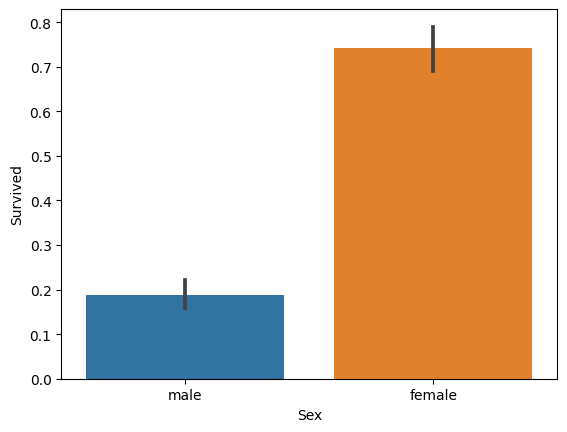

In [113]:
#위의 결과 시각화하기- x축: 성별 / y축: 생존자수의 가로 막대 차트
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

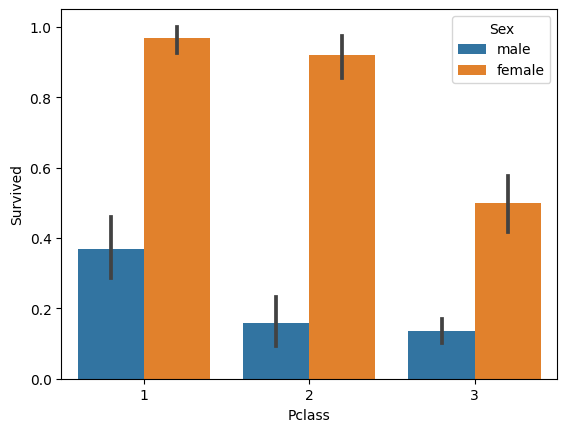

In [114]:
#부자와 가난한 사람 간 생존 확률 + 성별에 따라 구분분
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

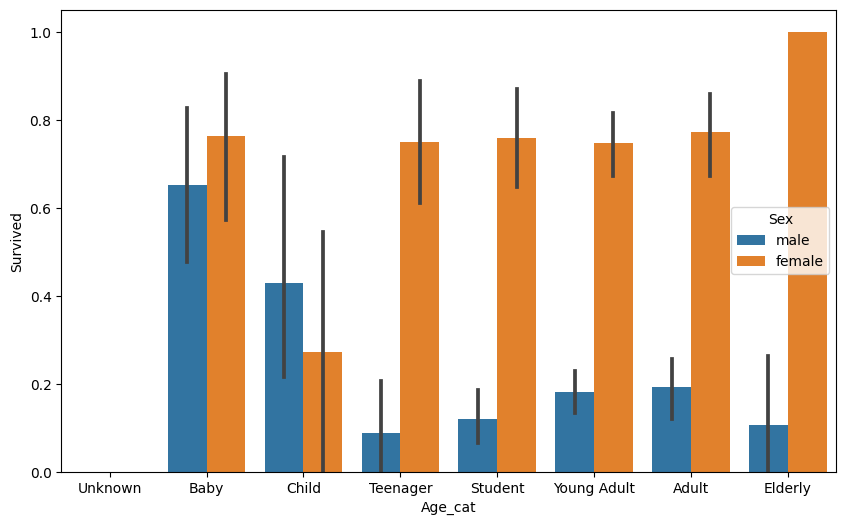

In [115]:
# Age에 따른 생존 확률

#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age<= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age<= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age<= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 학수를 반환값으로 지정.
# get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

# 결과: Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처

In [116]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
# 인코딩 : 사이킷런 LabelEncoder 클래스 > 레이블 인코딩 적용

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

#결과 :'Cabin','Sex','Embarked' 속성이 숫자형으로 바뀜 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [117]:
# 데이터의 전처리 전체적으로 호출하는 함수들 만들기

def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [118]:
#'Survived' 속성만 별도 분리해 클래스 결정값 데이터 세트로 생성
#'Survived' 속성만 드롭해 피처 데이터 세트 생성
# 위에서 만든 transform_features()로 데이터 가공

# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('/content/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [119]:
# train_test_spliy() API로 별도의 테스트 데이터 세트 추출

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [120]:
#ML 알고리즘: 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정 트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# 교차 검증으로 결정트리 모델 좀 더 평가해봄

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    #KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    #5개의 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [126]:
# 교차 검증 : cross_val_score() API 이용해 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [129]:
# GridSerchCV 이용한 DecisionTreeClassifier 최적 하이퍼 파라미터 찾기 & 예측성능 측정

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
